## 04-2 확률적 경사 하강법

### 1) 점진적인 학습

* **온라인 학습, 점진적 학습** : 교재 200쪽 설명 참조.

#### a) 확률적경사하강법(SGD)

* 경사하강법이란? : (이론적으로) 산을 내려갈 때 가장 빠른 방법은?

  - 가장 경사가 급한 길로 내려가기(경사하강법, gradient descent).

  - 경사가 가장 급한 길을 어떻게 찾을까?
    - 미분(다변수 함수의 경우 gradient)을 이용한 반복 계산.
  - 어떤 보폭으로 내려갈까? 적절한 학습률(learning rate, `lr`)이 중요! 201쪽 그림 참조.

      - 보폭(학습률)이 너무 크면 최소값의 위치를 지나쳐서 거꾸로 올라가버릴 수 있다.
      - 반대로 학습률이 너무 작으면 최소값의 위치에 접근하는 속도가 느려진다.





* 경사하강법의 종류

    1) 훈련 데이터 전체를 이용해서 찾는 방법 : 배치 경사하강법(batch gradient descent)

    2) 훈련 데이터 가운데 일부만 이용해서 찾는 방법 : 미니배치 경사하강법(minibatch gradient descent)
    
    3) 훈련 데이터 가운데 랜덤하게 단 하나의 샘플만 골라서 찾는 방법 : **확률적 경사하강법(stochastic gradient descent, SGD)**

배치 경사하강법의 단점 : 데이터 규모가 클 때 시간이 많이 걸리고 비효율적.

확률적 경사하강법의 장점 : 빠르다. 전체 훈련 데이터를 이용하지 않으므로 점진적인 학습이 가능하다.

<u>일단 이후 4장에서 말하는 '경사하강법'은 확률적 경사하강법.</u>

* epoch(에포크)

  확률적 경사하강법으로 랜덤으로 고른 샘플을 하나씩 사용해서 길을 찾아가다가 훈련 데이터세트에 있는 모든 샘플을 다 이용하고 나면?
    
  같은 과정을 다시 반복. 202쪽 그림 참조.

#### b) 손실 함수 (loss function)

'산을 내려간다'는 표현은 머신러닝 알고리즘이 제대로 작동하지 않아서 생길 수 있는 손실을 최소화하는 방법을 찾아야한다는 비유.

예) 손실함수가 $L(x) = x^2 - 2x + 3$ 이라면?

그래프를 그리거나 미분을 이용해서 바로 최소값의 위치 $x =1$을 찾을 것이다.



그런데 머신 러닝에서 나오는 손실함수는 (미분가능하기는 하지만) 이런 단순한 함수가 아니다. 손실함수가 한 변수만의 함수가 아니라 수백, 수천, 수만 개 변수들의 함수인 경우를 생각해보면 되겠다. 이럴 경우 간단한 방법으로 최소값의 위치를 찾을 수가 없으므로 경사하강법과 같이 한 걸음씩 점진적으로 최소값을 찾아가는 방법을 이용한다.

#### c) 로지스틱 손실함수

교재 204-206쪽의 설명은 모호하다.

먼저 간단히 target 변수가 0, 1 두 범주만 갖는 로지스틱 회귀 모델을 생각해보자.

학습한 모델은 샘플마다 예측확률 $$p = P(Y=1)$$ 값을 계산해서 이 값이 기준(보통 0.5)보다 크면 1로 분류하고 아니면 0으로 분류한다.


이진 분류에서 target값은 0, 1 두 값 중 하나만 갖고 모델이 추정한 확률 $p = {\rm P} (Y = 1) $은 0과 1 사이의 모든 값을 가질 수 있다.

만일 모델이 추정한 $p$가 1에 가깝다고 해보자. 우리는 0.7보다는 0.8, 또 0.9일 때 더 확실하게 target을 1로 분류할 것이다. 이때 만약 실제 target값이 1이라면 분류의 손실도 작다. 반대로 실제 target값이 0이라면 손실이 커진다.

또 $p$가 작을수록 더 확실하게 0으로 분류할 것이고 이때 target값이 0이라면 손실이 작아질 것이며 1이라면 손실이 커질 것이다.

이렇게 본다면 $p$가 실제 target값과 다를수록 손실은 커질 것이다.

즉 **실제 target 값이 1일 때에는 예측확률이 커야 손실이 작아지고 실제값이 0일 때에는 예측확률이 작아야 손실도 작아진다.**



그렇다면 <u>실제 target값과 예측확률 $p$의 차이를 가지고 손실의 크기를 나타낼 수 있겠다</u>. 만일 실제 target값이 1인데 $p$가 0.9일 경우와 0.6일 경우를 생각해보자. 둘 다 1로 올바르게 분류하기는 하겠지만 0.6과 실제값 1의 차이가 0.9와 1의 차이보다 크기 때문에 손실이 더 커진다. 물론 실제 target값이 1인데 예측확률 $p$가 1이라면 손실은 0일 것이다.

따라서 실제값이 1이라면 예측확률이 작아질수록 손실이 커진다. 반대로 실제값이 0이라면 예측확률이 커질수록 손실이 커진다.

$i$번째 샘플의 target값을 $y_i$, 예측확률을 $p_i$라고 하자.

$i$번째 샘플의  로지스틱 손실함수(log_loss)는 다음과 같이 계산한다.

$$ {\rm Logloss}_i = - [~ y_i \log p_i + (1-y_i ) \log ( 1- p_i ) ~] . $$

샘플 수가 $N$인 전체 데이터의 log_loss는 다음과 같다.

$$ \frac {1}{N} \sum_{i=1}^N {\rm Logloss}_i .$$

log_loss는 이진분류는 물론 다중분류에서도 이용하는 로지스틱 회귀 모델의 손실함수로서 **logistic loss**라는 뜻이다.

회귀나 SVM 분류모델(212쪽 참조)을 비롯한 다른 모델에서는 각기 또 다른 손실 함수를 사용한다(206쪽 설명 참조).

이진 분류를 위한 로지스틱 손실(log_loss)은 <u>"binary cross-entropy loss"</u>라고도 부른다. 다중 분류를 위한 로지스틱 손실은 그냥 <u>"cross-entropy loss"</u>라고 부른다.

### 2) SGDClassifier

5개의 feature 변수로 생선의 종류를 분류,예측하는 문제를 가지고 확률적경사하강법을 연습해보자.

In [1]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish[:5]

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
data = fish.iloc[:,1:6].to_numpy()
target = fish.iloc[:,0].to_numpy()

In [3]:
from sklearn.model_selection import train_test_split

train, test, target1, target2 = train_test_split(data, target, random_state=0,stratify=target)

In [4]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
strain=ss.fit_transform(train)
stest = ss.transform(test)

사이킷런의 `linear_model` 모듈로부터 `SGDClassifier` 클래스를 불러오자.

`SGDClassifier`는 <u>확률적경사하강법(SGD)을 이용한 분류 학습 클래스</u>다. 분류 알고리즘으로는 로지스틱회귀를 비롯한 여러가지를 이용할 수 있다.

여기서 [사이킷런의 도움말](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)을 잠깐 보자. 이 방법을 적용하기 전에 데이터를 표준화해야한다고 되어있다. 또한 `loss = `파라미터에 손실함수를 지정할 수 있는데 SGD를 이용한 로지스틱회귀 분류의 경우에는 `loss = log_loss`라고 지정하면 된다. 기본값은 로지스틱회귀가 아닌 서포트벡터머신(SVM)이라는 분류방법을 위한 손실함수(`hinge`)다.

또한 `max_iter=` 파라미터를 이용해서 최대 epoch 수를 지정할 수 있다. 기본값은 1,000이다.

In [31]:
from sklearn.linear_model import SGDClassifier

m=SGDClassifier(loss='log_loss',max_iter=30,random_state=0)
m.fit(strain,target1)

print(m.score(strain,target1))
print(m.score(stest,target2))

0.8739495798319328
0.825


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


결과가 만족스럽지 못하다.

`partial_fit()`을 이용해서 1 epoch 더 훈련해보자.

In [32]:
m.partial_fit(strain,target1)

print(m.score(strain,target1))
print(m.score(stest,target2))

0.9243697478991597
0.85


정확도가 향상되었다.

`partial_fit()`을 몇 차례 반복해보라. epoch 수를 한번씩 늘리면 매번 score 값이 달라질 것이다.

앞의 출력에는 경고 메시지가 나올텐데 반복계산하는 epoch의 수 즉 `max_iter`값이 작아서 충분한 계산을 못했다는 뜻이다. `max_iter` 값을 50이나 100으로 늘려서 다시 실행해도 경고가 나오는지 확인해보라.

* 퀴즈 :  `max_iter`값 즉 반복계산하는 epoch 수를 아주 크게 정하면 모델이 점점 좋아질까?

### 3) 에포크와 과대/과소적합

epoch 횟수가 적으면 모델이 훈련데이터를 충분히 학습할 수 없기 때문에 과소적합 모델이 생기기 쉽다. 하지만 에포크 수가 너무 많으면 반대로 과대적합의 위험이 높아진다. 210쪽 그림을 보라.

In [83]:
import numpy as np

train_score = []
test_score = []

classes = np.unique(target1)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

* 퀴즈 : 아래 코드는 SGD 로지스틱회귀 분류를 300번 거듭하는 반복문 코드다. 여기서 `for` 문에 나오는 밑줄(`_`)의 역할은 무엇인가?

In [84]:
m = SGDClassifier(loss='log_loss', random_state=0)

for _ in range(0, 300):
    m.partial_fit(strain, target1, classes=classes)

    train_score.append(m.score(strain, target1))
    test_score.append(m.score(stest, target2))

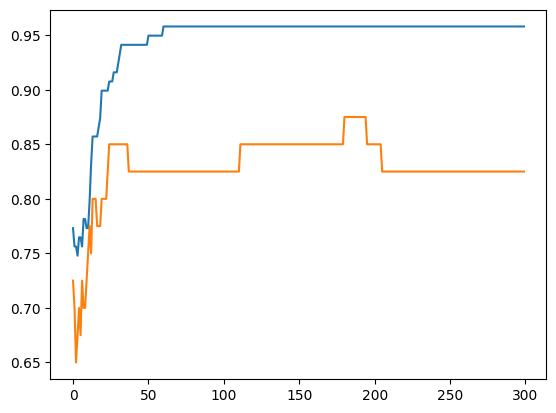

In [85]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [86]:
# test_score에서 최대값과 인덱스 찾기
ms = max(test_score)
mi = test_score.index(ms)

print(ms,mi)

0.875 180


In [87]:
d = max(train_score)-max(test_score)

print(d)

0.08298319327731096


In [88]:
# train_score와 test_score의 차이 계산
ds = [train - test for train, test in zip(train_score, test_score)]

# 최소 차이값과 그 인덱스 찾기
mds = min(ds)
mdi = ds.index(mds)

print(mds,mdi)

0.02310924369747902 10


그림을 보면 180회 정도가 적절해 보이므로 `max_iter = 180`으로 정하고 모델을 새로 만들어보자.

In [90]:
from sklearn.linear_model import SGDClassifier

m=SGDClassifier(loss='log_loss',max_iter=180,tol=None,random_state=0)
m.fit(strain,target1)

print(m.score(strain,target1))
print(m.score(stest,target2))

0.957983193277311
0.85


`SGDClassifier`에서 선택할 수 있는 손실함수로는 로지스틱 회귀 모델을 위한한 `log_loss` 이외에도 몇 가지가 더 있다. 교재 212쪽에서 잠깐 소개하는 `hinge` 손실함수는 SVM(support vector machine) 분류 알고리즘을 위한 것이다.

In [79]:
import numpy as np

train_score = []
test_score = []

classes = np.unique(target1)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [80]:
m = SGDClassifier(loss='hinge', random_state=0)

for _ in range(0, 300):
    m.partial_fit(strain, target1, classes=classes)

    train_score.append(m.score(strain, target1))
    test_score.append(m.score(stest, target2))

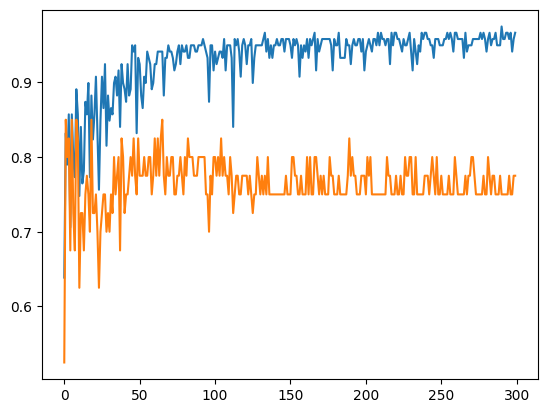

In [81]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.show()

In [82]:
from sklearn.linear_model import SGDClassifier

m=SGDClassifier(loss='hinge',max_iter=60,tol=None,random_state=0)
m.fit(strain,target1)

print(m.score(strain,target1))
print(m.score(stest,target2))

0.9327731092436975
0.775
